<a href="https://colab.research.google.com/github/enriquegiraldo/challenge1-data-science-latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [10]:
# --- Celda para Unificar DataFrames ---
print("--- Unificando DataFrames y añadiendo columna 'Tienda' ---")

# Añadir una columna para identificar cada tienda
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Unir todos los datos en un solo DataFrame llamado 'datos'
datos = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True) # ¡Aquí se crea 'datos'!

print("DataFrames unificados en el DataFrame 'datos'.")
print(f"Total de registros en 'datos': {len(datos)}")
print(datos.head())
print("-" * 50)

--- Unificando DataFrames y añadiendo columna 'Tienda' ---
DataFrames unificados en el DataFrame 'datos'.
Total de registros en 'datos': 9435
            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Mét

#1. Análisis de facturación




--- Paso 2: Calculando Facturación Total por Tienda ---
Facturación Total por Tienda:
     Tienda        Precio
0  Tienda 1  1.150880e+09
1  Tienda 2  1.116344e+09
2  Tienda 3  1.098020e+09
3  Tienda 4  1.038376e+09


<ipython-input-11-b184e081dc74>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Precio', data=facturacion, palette='viridis')


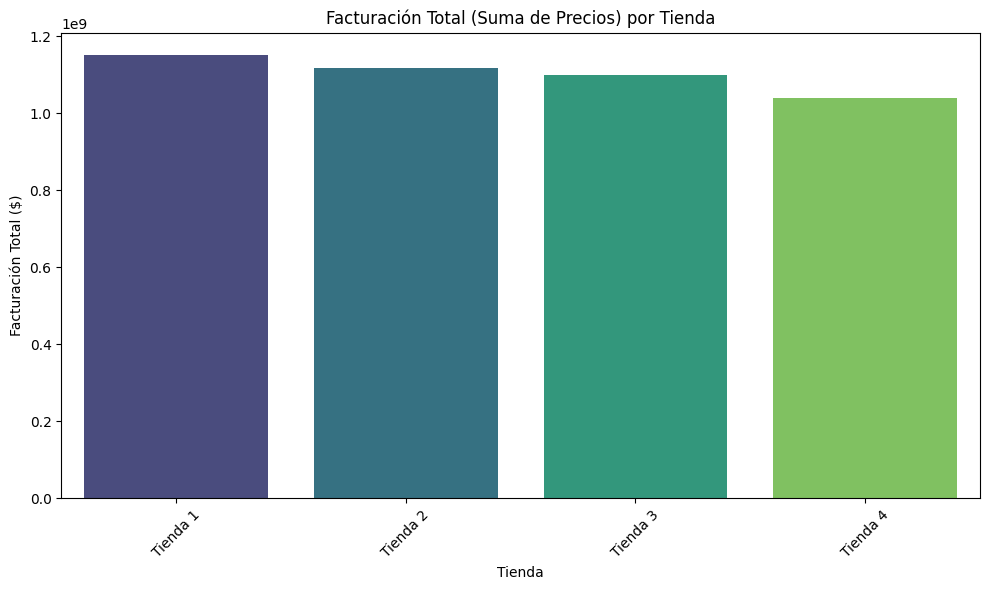

--------------------------------------------------


In [11]:
# --- Paso 2: Calculando Facturación Total por Tienda ---
print("\n--- Paso 2: Calculando Facturación Total por Tienda ---")

# Importar bibliotecas de visualización (si no lo has hecho antes)
import matplotlib.pyplot as plt
import seaborn as sns

# Ejemplo: datos['Precio'] = pd.to_numeric(datos['Precio'], errors='coerce')
facturacion = datos.groupby('Tienda')['Precio'].sum().reset_index().sort_values(by='Precio', ascending=False)
print("Facturación Total por Tienda:")
print(facturacion)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x='Tienda', y='Precio', data=facturacion, palette='viridis')
plt.title('Facturación Total (Suma de Precios) por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación Total ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("-" * 50)

# 2. Ventas por categoría


--- Paso 3: Analizando Ventas por Categoría (Cantidad) ---

Top 3 Categorías más populares por tienda (por número de ventas):
      Tienda Categoría del Producto  Numero_Ventas
23  Tienda 3                Muebles            499
31  Tienda 4                Muebles            480
7   Tienda 1                Muebles            465
27  Tienda 4           Electrónicos            451
19  Tienda 3           Electrónicos            451
3   Tienda 1           Electrónicos            448
15  Tienda 2                Muebles            442
11  Tienda 2           Electrónicos            422
29  Tienda 4               Juguetes            338
5   Tienda 1               Juguetes            324
21  Tienda 3               Juguetes            315
13  Tienda 2               Juguetes            313


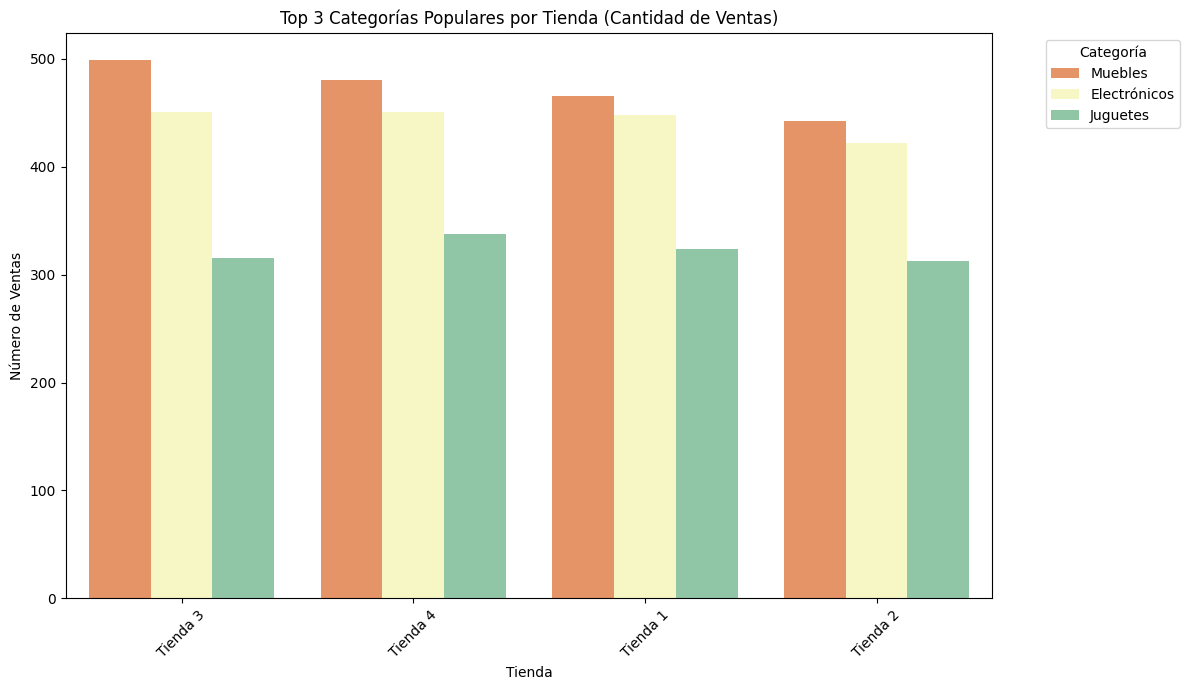

--------------------------------------------------


In [12]:
# --- Paso 3: Analizando Ventas por Categoría (Cantidad) ---
print("\n--- Paso 3: Analizando Ventas por Categoría (Cantidad) ---")
ventas_categoria = datos.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Numero_Ventas')

# Categorías más populares (Top 3) por tienda
top_n = 3
categorias_top = ventas_categoria.sort_values(by='Numero_Ventas', ascending=False)\
                                .groupby('Tienda')\
                                .head(top_n)
print(f"\nTop {top_n} Categorías más populares por tienda (por número de ventas):")
print(categorias_top)

# Visualización
plt.figure(figsize=(12, 7))
sns.barplot(x='Tienda', y='Numero_Ventas', hue='Categoría del Producto', data=categorias_top, palette='Spectral')
plt.title(f'Top {top_n} Categorías Populares por Tienda (Cantidad de Ventas)')
plt.xlabel('Tienda')
plt.ylabel('Número de Ventas')
plt.xticks(rotation=45)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
print("-" * 50)

# 3. Calificación promedio de la tienda



--- Paso 4: Calculando Calificación Promedio por Tienda ---
Calificación Promedio por Tienda:
     Tienda  Calificación
2  Tienda 3      4.048326
1  Tienda 2      4.037304
3  Tienda 4      3.995759
0  Tienda 1      3.976685


<ipython-input-13-0fcb69ed8ce8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Calificación', data=calificaciones_promedio, palette='coolwarm')


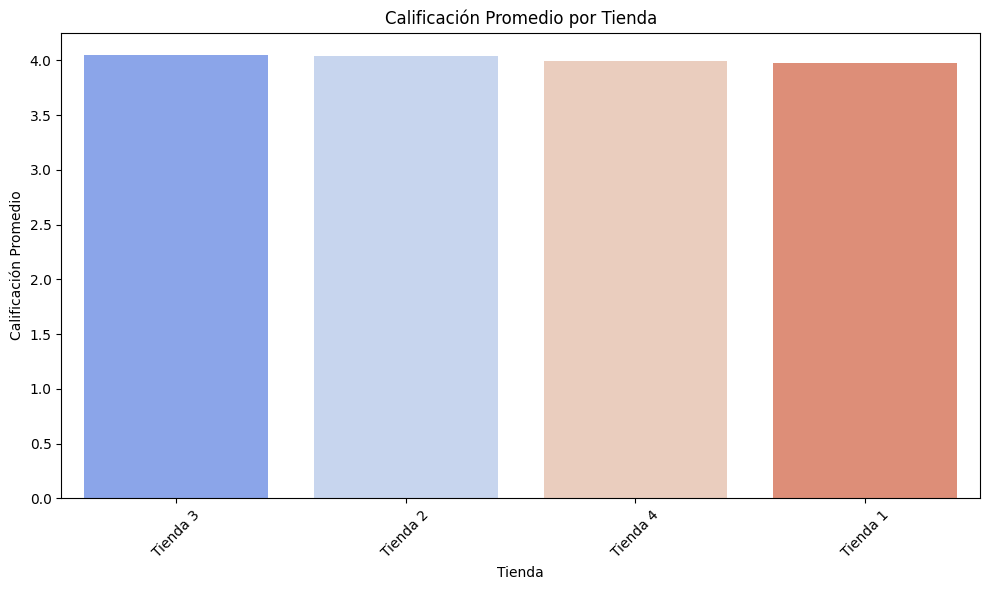

--------------------------------------------------


In [13]:
# --- Paso 4: Calculando Calificación Promedio por Tienda ---
print("\n--- Paso 4: Calculando Calificación Promedio por Tienda ---")

# Ejemplo: datos['Calificación'] = pd.to_numeric(datos['Calificación'], errors='coerce')
calificaciones_promedio = datos.groupby('Tienda')['Calificación'].mean().reset_index().sort_values(by='Calificación', ascending=False)
print("Calificación Promedio por Tienda:")
print(calificaciones_promedio)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x='Tienda', y='Calificación', data=calificaciones_promedio, palette='coolwarm')
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
# plt.ylim(0, 5) # Ajusta si tu escala es diferente (parece ser 1-5 según los datos)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("-" * 50)

# 4. Productos más y menos vendidos

In [14]:
# --- Paso 5: Identificando Productos Más y Menos Vendidos (Cantidad) ---
print("\n--- Paso 5: Identificando Productos Más y Menos Vendidos (Cantidad) ---")
ventas_producto = datos.groupby(['Tienda', 'Producto']).size().reset_index(name='Numero_Ventas')

# Producto más vendido por tienda
idx_mas_vendidos = ventas_producto.groupby('Tienda')['Numero_Ventas'].idxmax()
mas_vendidos = ventas_producto.loc[idx_mas_vendidos]

# Producto menos vendido por tienda
idx_menos_vendidos = ventas_producto.groupby('Tienda')['Numero_Ventas'].idxmin()
menos_vendidos = ventas_producto.loc[idx_menos_vendidos]

print("\nProducto MÁS vendido por tienda (por número de ventas):")
print(mas_vendidos)
print("\nProducto MENOS vendido por tienda (por número de ventas):")
print(menos_vendidos)
# Nota: Para este análisis, las tablas suelen ser más claras que un gráfico complejo.
print("-" * 50)


--- Paso 5: Identificando Productos Más y Menos Vendidos (Cantidad) ---

Producto MÁS vendido por tienda (por número de ventas):
       Tienda                   Producto  Numero_Ventas
1    Tienda 1                    Armario             60
75   Tienda 2  Iniciando en programación             65
129  Tienda 3              Kit de bancas             57
163  Tienda 4                   Cama box             62

Producto MENOS vendido por tienda (por número de ventas):
       Tienda                   Producto  Numero_Ventas
4    Tienda 1  Auriculares con micrófono             33
77   Tienda 2              Juego de mesa             32
111  Tienda 3    Bloques de construcción             35
175  Tienda 4         Guitarra eléctrica             33
--------------------------------------------------


# 5. Envío promedio por tienda


--- Paso 6: Calculando Costo Promedio de Envío por Tienda ---
Costo Promedio de Envío por Tienda:
     Tienda  Costo de envío
3  Tienda 4    23459.457167
2  Tienda 3    24805.680373
1  Tienda 2    25216.235693
0  Tienda 1    26018.609580


<ipython-input-17-1ceed613cc0b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Costo de envío', data=costo_envio_promedio, palette='magma')


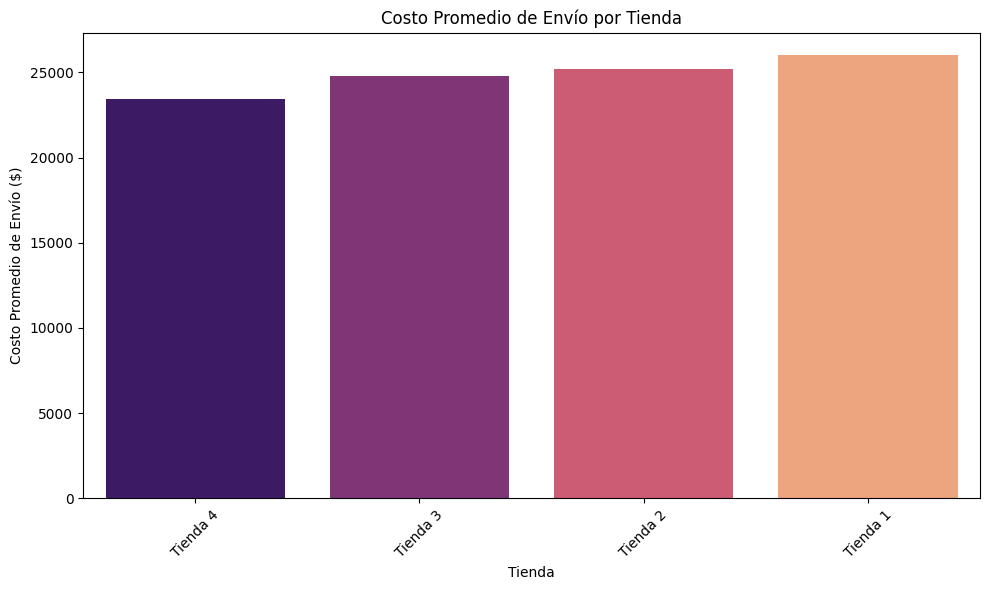

--------------------------------------------------

--- Paso 7: Creando Tabla Resumen para Recomendación ---
Tabla Resumen de Métricas Clave por Tienda:
     Tienda  Facturacion_Total  Calificacion_Promedio  Costo_Envio_Promedio
0  Tienda 1       1.150880e+09               3.976685          26018.609580
1  Tienda 2       1.116344e+09               4.037304          25216.235693
2  Tienda 3       1.098020e+09               4.048326          24805.680373
3  Tienda 4       1.038376e+09               3.995759          23459.457167
--------------------------------------------------

--- Recomendación Final ---

**Análisis Conclusivo**

1.  **Facturación Total**
    La facturación total por tienda es un indicador clave del desempeño financiero. Según los datos:
    * Tienda 1: $1,150,880,000
    * Tienda 2: $1,116,344,000
    * Tienda 3: $1,098,020,000
    * Tienda 4: $1,038,376,000
    *Observación:* La Tienda 4 tiene la menor facturación, lo que sugiere un rendimiento financiero inferior e

In [17]:
# --- Paso 6: Calculando Costo Promedio de Envío por Tienda ---
print("\n--- Paso 6: Calculando Costo Promedio de Envío por Tienda ---")
# Asegurarse de que 'Costo de envío' sea numérico
# (Si ya lo hiciste en una celda anterior, esta línea se puede comentar o eliminar)
# datos['Costo de envío'] = pd.to_numeric(datos['Costo de envío'], errors='coerce')
costo_envio_promedio = datos.groupby('Tienda')['Costo de envío'].mean().reset_index().sort_values(by='Costo de envío', ascending=True)
print("Costo Promedio de Envío por Tienda:")
print(costo_envio_promedio)

# Visualización (Asegúrate de tener matplotlib y seaborn importados)
# import matplotlib.pyplot as plt
# import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Tienda', y='Costo de envío', data=costo_envio_promedio, palette='magma')
plt.title('Costo Promedio de Envío por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo Promedio de Envío ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("-" * 50)

# --- Paso 7: Creando Tabla Resumen para Recomendación ---
print("\n--- Paso 7: Creando Tabla Resumen para Recomendación ---")

# Calcular métricas si no están definidas globalmente (asegúrate de que 'datos' exista)
# Si 'facturacion' y 'calificaciones_promedio' ya existen por celdas anteriores, puedes comentar estas líneas
facturacion = datos.groupby('Tienda')['Precio'].sum().reset_index()
calificaciones_promedio = datos.groupby('Tienda')['Calificación'].mean().reset_index()

# Combinar las métricas en una tabla resumen
# (Asegúrate de que 'costo_envio_promedio' también exista o calcúlalo aquí si es necesario)
resumen = facturacion.merge(calificaciones_promedio, on='Tienda')\
                     .merge(costo_envio_promedio, on='Tienda')

# Renombrar columnas para claridad
resumen.rename(columns={'Precio': 'Facturacion_Total',
                         'Calificación': 'Calificacion_Promedio',
                         'Costo de envío': 'Costo_Envio_Promedio'}, inplace=True)

print("Tabla Resumen de Métricas Clave por Tienda:")
print(resumen) # Imprime la tabla resumen que creaste
print("-" * 50)

# --- Recomendación Final ---
print("\n--- Recomendación Final ---")

# Aquí se inserta TU análisis y recomendación específicos:
print("""
**Análisis Conclusivo**

1.  **Facturación Total**
    La facturación total por tienda es un indicador clave del desempeño financiero. Según los datos:
    * Tienda 1: $1,150,880,000
    * Tienda 2: $1,116,344,000
    * Tienda 3: $1,098,020,000
    * Tienda 4: $1,038,376,000
    *Observación:* La Tienda 4 tiene la menor facturación, lo que sugiere un rendimiento financiero inferior en comparación con las demás tiendas.

2.  **Ventas por Categoría (Cantidad)**
    Las categorías más populares por tienda, basadas en el número de ventas, son:
    * Tienda 1: Muebles (465), Electrónicos (448), Juguetes (324)
    * Tienda 2: Muebles (442), Electrónicos (422), Juguetes (313)
    * Tienda 3: Muebles (499), Electrónicos (451), Juguetes (315)
    * Tienda 4: Muebles (480), Electrónicos (451), Juguetes (338)
    *Observación:* Todas las tiendas tienen un desempeño similar en las categorías principales (Muebles, Electrónicos y Juguetes), pero la Tienda 4 no destaca particularmente, y su facturación más baja indica que, a pesar de un volumen de ventas decente, los productos vendidos podrían tener un menor valor promedio.

3.  **Calificaciones Promedio**
    Las calificaciones reflejan la satisfacción del cliente, un factor importante para la sostenibilidad a largo plazo:
    * Tienda 3: 4.048326 (la mejor)
    * Tienda 2: 4.037304
    * Tienda 4: 3.995759
    * Tienda 1: 3.976685 (la peor)
    *Observación:* La Tienda 1 tiene la calificación más baja, lo que podría indicar problemas de satisfacción del cliente. La Tienda 4, aunque no tiene la peor calificación, está por debajo de las Tiendas 2 y 3, lo que no la posiciona como líder en experiencia del cliente.

4.  **Productos Más y Menos Vendidos**
    *Producto más vendido:*
    * Tienda 1: Armario (60 ventas)
    * Tienda 2: Iniciando en programación (65 ventas)
    * Tienda 3: Kit de bancas (57 ventas)
    * Tienda 4: Cama box (62 ventas)
    *Producto menos vendido:*
    * Tienda 1: Auriculares con micrófono (33 ventas)
    * Tienda 2: Juego de mesa (32 ventas)
    * Tienda 3: Bloques de construcción (35 ventas)
    * Tienda 4: Guitarra eléctrica (33 ventas)
    *Observación:* La Tienda 4 tiene un producto menos vendido (Guitarra eléctrica, 33 ventas) que refleja una debilidad en su oferta, pero su producto más vendido (Cama box) no compensa su baja facturación general.

**Recomendación Final**

Basado en el análisis, recomiendo vender la **Tienda 4**. A continuación, detallo las razones principales:

* **Menor Facturación:** Con $1,038,376,000, la Tienda 4 genera significativamente menos ingresos que las demás, lo que indica un bajo desempeño financiero y una menor contribución al negocio global del Sr. Juan.
* **Debilidad Competitiva:** Aunque tiene un volumen de ventas aceptable en categorías clave como Muebles y Electrónicos, su facturación sugiere que los productos vendidos tienen un valor promedio más bajo, lo que limita su rentabilidad.
* **Optimización de Recursos:** La calificación promedio de la Tienda 4 (3.995759) no es la peor, pero tampoco sobresale. Venderla liberaría recursos que podrían reinvertirse en mejorar otras tiendas, como la Tienda 1, que tiene alta facturación pero problemas de satisfacción del cliente.

**Consideraciones Adicionales:**
* Tienda 1: A pesar de su calificación baja (3.976685), su facturación líder ($1,150,880,000) sugiere que sigue siendo rentable. Mejorar la experiencia del cliente podría maximizar su potencial.
* Tienda 2 y 3: Ambas tienen facturación sólida y calificaciones superiores, lo que las hace más valiosas para mantener.

Por lo tanto, la **Tienda 4** es la candidata más adecuada para la venta, ya que combina el menor rendimiento financiero con un desempeño promedio que no justifica su continuidad frente a las otras opciones.

**Conclusión:** Vender la Tienda 4 permitiría al Sr. Juan enfocarse en optimizar las tiendas más rentables y abordar problemas específicos, como la satisfacción del cliente en la Tienda 1, para fortalecer su negocio a largo plazo.
""")
print("-" * 50)
print("Análisis completado.")